In [6]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

DATA_DIR = "../data/wood-defects-parsed"  # Updated to match the correct data directory

def count_yolo_classes(labels_dir):
    class_counts = Counter()
    n_bbox_counts = Counter()
    
    # Iterate over all label files
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):  # Ensure only text files are read
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, "r") as file:
                lines = file.readlines()
                n_bbox_counts[len(lines)] += 1
                if not lines:
                    class_counts["No labels"] += 1  # Count empty files
                else:
                    for line in lines:
                        parts = line.strip().split()
                        if parts:
                            class_id = parts[0]  # First element is class ID
                            class_counts[class_id] += 1
    
    return class_counts, n_bbox_counts

# Updated to use the correct labels directory path
labels_directory = f"{DATA_DIR}/labels/train"  # Using train split as an example
class_counts, n_bbox_counts = count_yolo_classes(labels_directory)

labelcounts = pd.Series(class_counts, name="Occurrences").sort_index()  # Fixed typo in "Occurrences"
bbox_per_img = pd.Series(n_bbox_counts, name="N_BBoxes").sort_index()


In [12]:
labelcounts

0             127
1            2852
2             141
3             465
4            2066
5             364
6              92
7             355
No labels     276
Name: Occurrences, dtype: int64

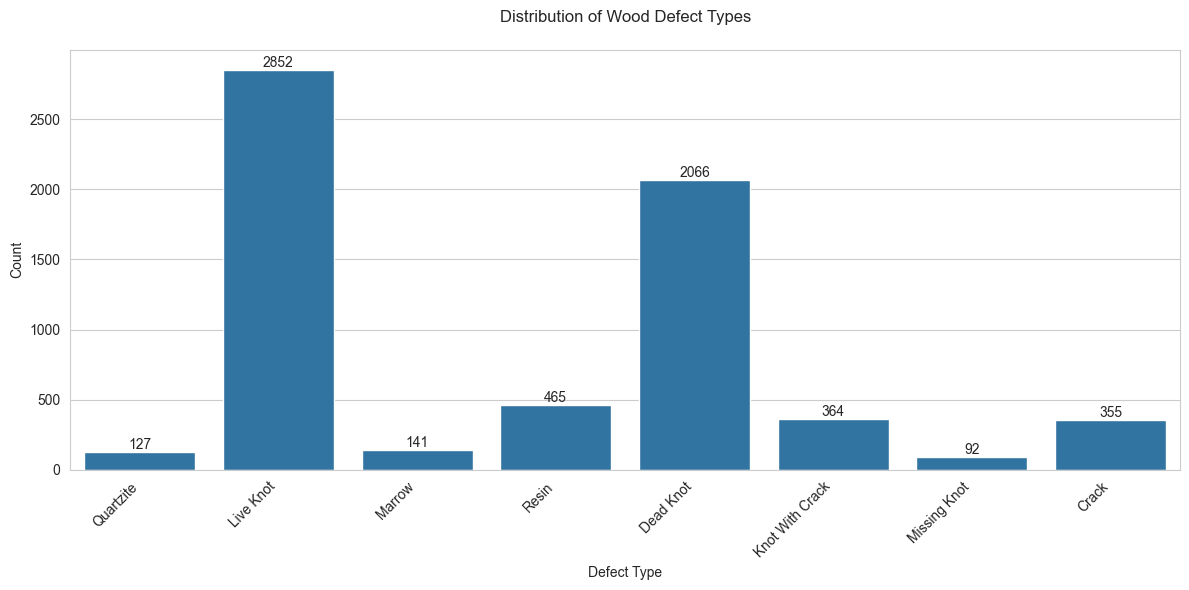

In [17]:
import seaborn as sns

labels = {
    0: "Quartzite",
    1: "Live Knot",
    2: "Marrow",
    3: "Resin", 
    4: "Dead Knot",
    5: "Knot With Crack",
    6: "Missing Knot",
    7: "Crack"
}
# Create a DataFrame from the label counts and map numeric indices to label names
df_labels = labelcounts.to_frame().iloc[:-1]
# Handle 'No labels' case separately
df_labels.index = df_labels.index.map(lambda x: labels[int(x)] if x != 'No labels' else 'No labels')

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create bar plot using seaborn
ax = sns.barplot(data=df_labels, x=df_labels.index, y='Occurrences')

# Customize the plot
plt.title("Distribution of Wood Defect Types", pad=20)
plt.xlabel("Defect Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(df_labels['Occurrences']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [22]:
# Calculate average number of bounding boxes per image
avg_bboxes = sum(bbox_per_img.index * bbox_per_img) / sum(bbox_per_img)
print(f"Average number of bounding boxes per image: {avg_bboxes:.2f}")

# Display the distribution
bbox_per_img

Average number of bounding boxes per image: 2.31


0     276
1     654
2     816
3     515
4     298
5     137
6      57
7      18
8      10
9       6
10      5
11      2
12      2
13      2
15      2
Name: N_BBoxes, dtype: int64

In [ ]:
df_bbox = bbox_per_img.to_frame()
df_bbox.plot.bar(width=1, title="Number of Defect Boxes Per Image")

In [ ]:
labelcounts.plot.bar(title="Label Counts")

## Images

In [15]:
DATA_DIR = "./data/kaggle-wood-defects"
from PIL import Image
from dataclasses import dataclass

@dataclass
class BoundingBoxDetails:
    x: int
    y: int
    width: int
    height: int


def get_bounding_box_info(image_id):
    file_path = os.path.join(DATA_DIR, "labels-yolo/") + str(image_id) + ".txt"
    with open(file_path, 'r') as file:
        print(file.readlines()[0].strip())

def draw_bboxes(image_id):
    img_dir = os.path.join(DATA_DIR, "images/") + str(image_id) + ".jpg"
    img = Image.open(img_dir)
    img.show()

# draw_bboxes(99100007)
get_bounding_box_info(99100007)

1 0.49875 0.6279296875 0.0425 0.09765625
